## Problem Statement:
You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

### Heart Disease Dataset:
### UCI Heart Disease Dataset
(https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)
### Lab Environment:
Jupyter Notebooks
### Domain:
Healthcare

## Tasks To Be Performed:
### 1. Data Analysis:
    
a. Import the dataset

b. Get information about the dataset (mean, max, min, quartiles etc.)

c. Find the correlation between all fields

### 2. Data Visualization:

a. Visualize the number of patients having a heart disease and not having

a heart disease

b. Visualize the age and whether a patient has disease or not

c. Visualize correlation between all features using a heat map

### 3. Logistic Regression:

a. Build a simple logistic regression model:
    
i. Divide the dataset in 70:30 ratio
    
ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

### 4. Decision Tree:

a. Build a decision tree model:
    
i. Divide the dataset in 70:30 ratio
    
ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the decision tree using the Graphviz package

### 5. Random Forest:

a. Build a Random Forest model:
    
i. Divide the dataset in 70:30 ratio
    
ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the model using the Graphviz package

### 6. Select the best model

a. Print the confusion matrix of all classifiers

b. Print the classification report of all classifiers

c. Calculate Recall Precision and F1 score of all the models

d. Visualize confusion matrix using heatmaps

e. Select the best model based on the best accuracies


# Importing the dataset

In [3]:
pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3b/07/1252560194df2b4fad1cb3c46081b948331c63eb1bb0b97620d508d12a53/ucimlrepo-0.0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler

In [8]:
# Convert y to a 1D array
y = y.iloc[:, 0]

In [10]:
# Data Analysis
# Get information about the dataset
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [12]:
# Find the correlation between all fields
correlation = X.corr()
correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004


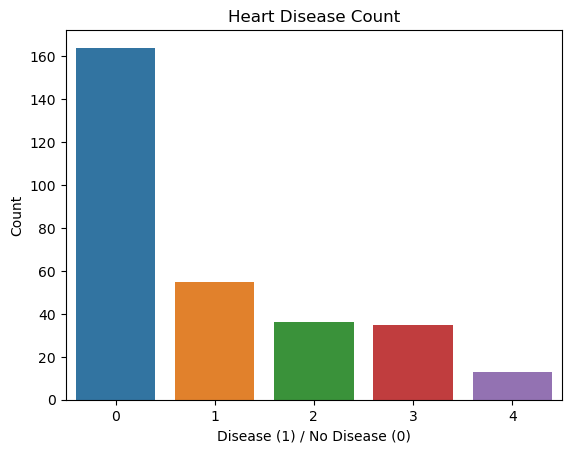

In [13]:
# Data Visualization
# Visualize the number of patients having a heart disease and not having a heart disease
sns.countplot(x=y)
plt.title('Heart Disease Count')
plt.xlabel('Disease (1) / No Disease (0)')
plt.ylabel('Count')
plt.show()

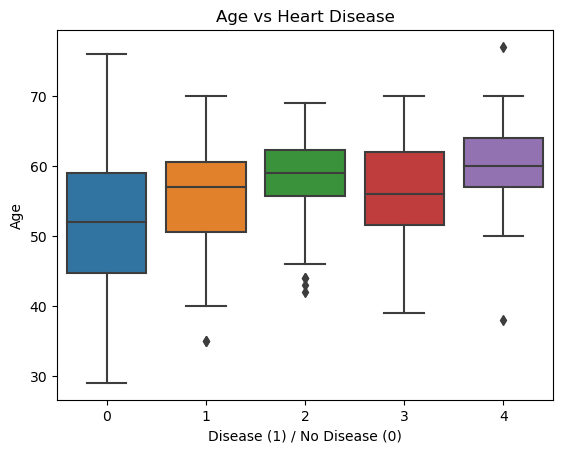

In [14]:
# Visualize the age and whether a patient has disease or not
sns.boxplot(x=y, y=X['age'])
plt.title('Age vs Heart Disease')
plt.xlabel('Disease (1) / No Disease (0)')
plt.ylabel('Age')
plt.show()

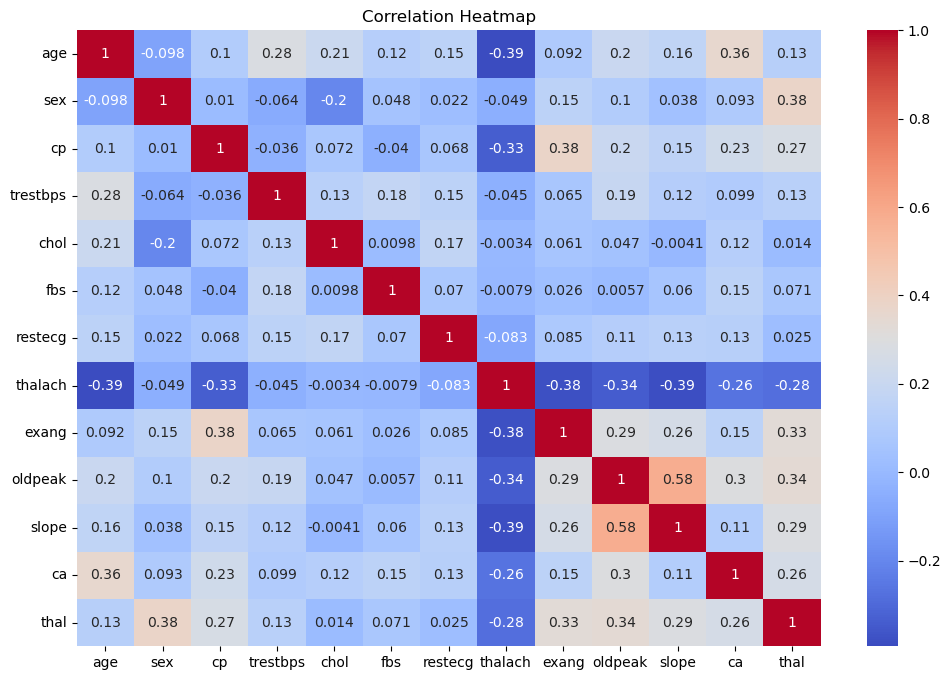

In [15]:
# Visualize correlation between all features using a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Logistic Regression
# Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [1]:
# Build the model on train set and predict the values on test set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

In [ ]:

# Build the model on train set and predict the values on test set
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

# Build the confusion matrix and get the accuracy score
logreg_cm = confusion_matrix(y_test, logreg_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Confusion Matrix:\n", logreg_cm)
print("Logistic Regression Accuracy:", logreg_accuracy)

# Decision Tree
# Build the model on train set and predict the values on test set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

# Build the confusion matrix and calculate the accuracy
dt_cm = confusion_matrix(y_test, dt_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:\n", dt_cm)
print("Decision Tree Accuracy:", dt_accuracy)

# Visualize the decision tree using the Graphviz package
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=True, filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

# Random Forest
# Build the model on train set and predict the values on test set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Build the confusion matrix and calculate the accuracy
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Accuracy:", rf_accuracy)

# Select the best model
# Print the classification report of all classifiers
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Calculate Recall, Precision, and F1 score of all the models
logreg_report = classification_report(y_test, logreg_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)
rf_report = classification_report(y_test, rf_predictions, output_dict=True)

# Visualize confusion matrix using heatmaps
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Logistic Regression CM')
plt.subplot(1, 3, 2)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree CM')
plt.subplot(1, 3, 3)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Random Forest CM')
plt.show()

# Select the best model based on the best accuracies
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

best_model = 'Logistic Regression' if logreg_accuracy >= dt_accuracy and logreg_accuracy >= rf_accuracy else 'Decision Tree' if dt_accuracy >= rf_accuracy else 'Random Forest'
print("The best model is:", best_model)
